In [1]:
# import neccssary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# read file into dataframe
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#1 drop unnecessary features
# features = [area_type, location, size,total_sqft, bath]
# target = price
# drop others
df1 = df.drop(['availability', 'society', 'balcony'], axis = 'columns')
df1.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
#2  data cleaning/ munging

In [4]:
# change area_type to numeric- categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['area_type_n'] = le.fit_transform(df1['area_type'])
df1.head()

,area_type,location,size,total_sqft,bath,price,area_type_n
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,3
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,2
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,3


In [5]:
# store the area_type and numeric version as key and values of a dictionary
area_key =df1['area_type'].unique()
area_val = df1['area_type_n'].unique()
area_dict = dict(zip(area_key, area_val))
area_dict

{'Super built-up  Area': 3,
 'Plot  Area': 2,
 'Built-up  Area': 0,
 'Carpet  Area': 1}

In [6]:
#  drop string version of area_type
df2 = df1.drop('area_type', axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price,area_type_n
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,3
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,2
2,Uttarahalli,3 BHK,1440,2.0,62.00,0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,3


In [7]:
# check for None values
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
price           0
area_type_n     0
dtype: int64

In [8]:
# drop rows with None Values
df3 =df2.dropna()
df3.isnull().sum()

location       0
size           0
total_sqft     0
bath           0
price          0
area_type_n    0
dtype: int64

In [9]:
# check the unique values in size
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
# get the numer of bedrooms as integer values 
df3['num_bedrms']  = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

C:\Users\OzechiSamuel\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,location,size,total_sqft,bath,price,area_type_n,num_bedrms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,3,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,2,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,0,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,3
4,Kothanur,2 BHK,1200,2.0,51.00,3,2


In [11]:
# drop string version of bedrooms
df4 = df3.drop('size', axis = 'columns')
df4.head()

,location,total_sqft,bath,price,area_type_n,num_bedrms
0,Electronic City Phase II,1056,2.0,39.07,3,2
1,Chikka Tirupathi,2600,5.0,120.00,2,4
2,Uttarahalli,1440,2.0,62.00,0,3
3,Lingadheeranahalli,1521,3.0,95.00,3,3
4,Kothanur,1200,2.0,51.00,3,2


In [12]:
# check the number of unique locations
len(df4['location'].unique())

1304

In [13]:
# remove the leading and trailing whitespaces in locations
df4['location'] = df4['location'].apply(lambda x: x.strip())
len(df4['location'].unique())

1293

In [14]:
# check the unique values in total_sqft
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
# check the datatype of values in total_sqft
type(df4['total_sqft'].values[0])

str

In [16]:
# get the non number values in total_sqft
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
non_float = df4[~df4['total_sqft'].apply(is_float)]
non_float.head()

,location,total_sqft,bath,price,area_type_n,num_bedrms
30,Yelahanka,2100 - 2850,4.0,186.000,3,4
122,Hebbal,3067 - 8156,4.0,477.000,3,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,3,2
165,Sarjapur,1145 - 1340,2.0,43.490,3,2
188,KR Puram,1015 - 1540,2.0,56.800,3,2


In [17]:
# get the average of total_sqft in range format
# change non number values to None
def average_total_sqft(x):
    y = x.split('-')
    if len(y) == 2:
        return (float(y[0]) + float(y[1])) / 2
    try:
        return(float(x))
    except:
        return None
df4['total_sqft'] = df4['total_sqft'].apply(average_total_sqft)
df4['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [18]:
# check the number of None values
df4.isnull().sum()

location        0
total_sqft     46
bath            0
price           0
area_type_n     0
num_bedrms      0
dtype: int64

In [19]:
# drop None values
df5 = df4.dropna()
df5.isnull().sum()

location       0
total_sqft     0
bath           0
price          0
area_type_n    0
num_bedrms     0
dtype: int64

In [20]:
# show the current dataframe
df5.head()

,location,total_sqft,bath,price,area_type_n,num_bedrms
0,Electronic City Phase II,1056.0,2.0,39.07,3,2
1,Chikka Tirupathi,2600.0,5.0,120.00,2,4
2,Uttarahalli,1440.0,2.0,62.00,0,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3,3
4,Kothanur,1200.0,2.0,51.00,3,2


In [ ]:
#3 feature engineering and dimensionality reduction

In [21]:
# get the number of data points for each loaction
location_stats = df5.groupby('location')['location'].count().sort_values(ascending = False)
location_stats

location
Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [22]:
# get locations with less than data points
locs_less_than_10 = location_stats[location_stats<10]
len(locs_less_than_10)

1033

In [23]:
# show locations with less than 10 data points
locs_less_than_10

location
Kaverappa Layout        9
Peenya                  9
Gollahalli              9
Chennammana Kere        9
2nd Phase JP Nagar      9
                       ..
Kumbhena Agrahara       1
Kudlu Village,          1
Konappana Agrahara      1
Kodanda Reddy Layout    1
1 Annasandrapalya       1
Name: location, Length: 1033, dtype: int64

In [24]:
# change all locations with data points less than 10 to 'other'
# show the current values of unique locations
df5['location'] = df5['location'].apply(lambda x: 'other' if x in locs_less_than_10 else x)
len(df5['location'].unique())

C:\Users\OzechiSamuel\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


255

In [25]:
#show current dataframe
df5.head()

,location,total_sqft,bath,price,area_type_n,num_bedrms
0,Electronic City Phase II,1056.0,2.0,39.07,3,2
1,Chikka Tirupathi,2600.0,5.0,120.00,2,4
2,Uttarahalli,1440.0,2.0,62.00,0,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3,3
4,Kothanur,1200.0,2.0,51.00,3,2


In [ ]:
#4 outliers removal

In [26]:
# show abnormal room spaces (with less than 300sqft per from)
# using 300sqft per room as norm room space threshold
df5[(df5.total_sqft/df5.num_bedrms) < 300].head()

,location,total_sqft,bath,price,area_type_n,num_bedrms
9,other,1020.0,6.0,370.0,2,6
45,HSR Layout,600.0,9.0,200.0,2,8
58,Murugeshpalya,1407.0,4.0,150.0,2,6
68,Devarachikkanahalli,1350.0,7.0,85.0,2,8
70,other,500.0,3.0,100.0,2,3


In [27]:
# get data points with normal room spaces
df6 = df5[(df5.total_sqft/df5.num_bedrms) > 300]
df6.shape

(12274, 6)

In [28]:
# create price per sqft column
df6['price_per_sqft'] = (df6.price * 100000) / df6.total_sqft
df6.head()

C:\Users\OzechiSamuel\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,location,total_sqft,bath,price,area_type_n,num_bedrms,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,3,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,2,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,0,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,3,2,4250.000000


In [29]:
# remove price_per_sqft_outliers using mean and standard deviation

def remove_pps_outliers(df):
    loc_groups = df.groupby('location')
    final_df = pd.DataFrame()
    for location, group in loc_groups:
        mean = group['price_per_sqft'].mean()
        std  = group['price_per_sqft'].std()
        reduced_df = group[((group.price_per_sqft >= (mean - std)) & (group.price_per_sqft <= (mean + std)))]
        final_df = pd.concat([final_df, reduced_df], ignore_index = True)
    return final_df

In [30]:
df7 = remove_pps_outliers(df6)
df7.head()

,location,total_sqft,bath,price,area_type_n,num_bedrms,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,3,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,3,2,11983.805668


In [31]:
# plot scatter plot of 2 and 3 rooms in same locations
%matplotlib inline
def plot_scatter(df, location):
    rms2 = df[(df.location==location) & (df.num_bedrms == 2)]
    rms3 = df[(df.location==location) & (df.num_bedrms == 3)]
    plt.scatter(rms2.total_sqft, rms2.price,  color = 'red', alpha =  0.5, label = '2 bedrooms')
    plt.scatter(rms3.total_sqft, rms3.price,  color = 'blue', alpha = 0.5, label = '3 bedrooms')
    plt.xlabel('Total square feet')
    plt.ylabel('Price')
    plt.legend()
    plt.title(location)

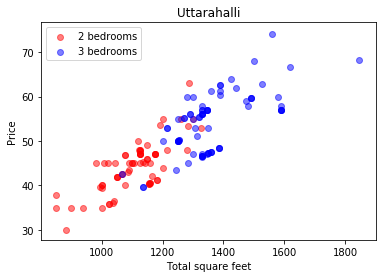

In [32]:
plot_scatter(df7, 'Uttarahalli')

In [33]:
# remove bedroom outliers
def remove_bedrms_outliers(df):
    excluded_indices = np.array([])
    for key, loc_group in df.groupby('location'):
        room_stats = {}
        for rooms, room_df in loc_group.groupby('num_bedrms'):
            room_stats[rooms] = {
                      'mean' : room_df.price.mean(),
                      'count' : room_df.shape[0]
            }
       
        for rooms, room_df in loc_group.groupby('num_bedrms'):
            pre_start = room_stats.get(rooms - 1)
            if pre_start and pre_start['count'] > 5:
                excluded_indices = np.append(excluded_indices, room_df[room_df.price < (pre_start['mean'])].index.values)
    return  df.drop(excluded_indices, axis = 'index')

In [34]:
df8 = remove_bedrms_outliers(df7)
df8.shape

(9304, 7)

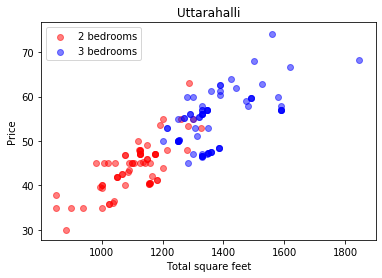

In [35]:
plot_scatter(df8, 'Uttarahalli')

In [36]:
# show excess bathrooms outliers
df8[df8.bath>df8.num_bedrms+2]

,location,total_sqft,bath,price,area_type_n,num_bedrms,price_per_sqft
564,BTM 1st Stage,3300.0,14.0,500.0,2,9,15151.515152
1593,Chikkabanavar,2460.0,7.0,80.0,0,4,3252.032520
5203,Nagasandra,7000.0,8.0,450.0,0,4,6428.571429
6687,Thanisandra,1806.0,6.0,116.0,3,3,6423.034330
8345,other,11338.0,9.0,1000.0,3,6,8819.897689


In [37]:
# remove excess bathrooms outliers 
df9 = df8[df8.bath<df8.num_bedrms+2]
df9.shape

(9215, 7)

In [38]:
# get numeric values for location column
dummies = pd.get_dummies(df9.location).drop('other', axis = 'columns')
df10 = pd.concat([df9, dummies], axis= 'columns')
df10.head()

,location,total_sqft,bath,price,area_type_n,num_bedrms,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,3,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,3,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,0,3,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,3,2,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# drop unnecessary features
df11 = df10.drop(['location', 'price_per_sqft'], axis = 'columns')
df11.head()

,total_sqft,bath,price,area_type_n,num_bedrms,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,3,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,3,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# show shape of finall dataframe
df11.shape

In [41]:
# get features and target data
features = df11.drop('price', axis = 'columns')
target = df11['price']

In [42]:
# show feaetures dataframe
features.head()

,total_sqft,bath,area_type_n,num_bedrms,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,3,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,3,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
target.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [ ]:
#5 find the best machine learning model to train data

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [45]:
def find_best_model(features, target):
    config =  {
        'LinearRgression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]  
                 }
            },
         'Lasso' : {
             'model'  : Lasso(),
             'params' : {
                 'alpha' : [1.0, 2.0, 4.0, 5.0],
                 'normalize'  : [True, False],
                 'precompute' : [True, False],
                 'positive'   : [True, False],
                 'selection'  : ['cyclic', 'random']
             }
         },
        'DecisionTree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
               'criterion' : ["mse", "friedman_mse", "mae"],
                'splitter' : ["best", "random"]  
            }
        }
       
    }
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state=0)
    scores = []
    for model_name, model_params in config.items():
        clf = GridSearchCV(model_params['model'], model_params['params'], cv = cv, return_train_score= False)
        clf.fit(features, target)
        scores.append({
            'model' :  model_name,
            'best_params': clf.best_params_,
            'best_score' : clf.best_score_
        })
    return pd.DataFrame(scores)

In [46]:
scores_df = find_best_model(features, target)
scores_df

,model,best_params,best_score
0,LinearRgression,{'normalize': False},0.839044
1,Lasso,"{'alpha': 1.0, 'normalize': False, 'positive':...",0.701982
2,DecisionTree,"{'criterion': 'mae', 'splitter': 'random'}",0.700846


In [ ]:
#6 train model

In [47]:
from sklearn.model_selection import train_test_split
def train_model(features, target):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)
    clf = LinearRegression(normalize =  False)
    return clf.fit(x_train, y_train)

In [48]:
clf = train_model(features, target)
clf

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#7 predict with model

In [49]:
def predict(location, total_sqft, area_type, num_bedrms, bath):
    loc_index = np.where(features.columns == location)[0][0]
    if area_type in area_dict:
        area_type = area_dict[area_type]
    data = np.zeros(len(features.columns))
    data[0] = total_sqft
    data[1] = bath
    data[2] = area_type
    data[3] = num_bedrms
    if loc_index >= 0:
        data[loc_index] == 1
    return clf.predict([data])[0]

In [ ]:
predict('1st Block Jayanagar', 1000, 'Plot  Area', 4,  5)

In [ ]:
#8 save model and columns

In [50]:
from sklearn.externals import joblib
joblib.dump(clf, 'bengaluru_home_price_model')

C:\Users\OzechiSamuel\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['bengaluru_home_price_model']

In [53]:
import pickle
import json
columns = {
    'data_columns' : [col.lower() for col in features.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))